In [71]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None

# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import *
from src.support_handling import impute_knn

## Data loading

In [72]:
df_employee_survey = pd.read_csv('../data/raw/employee_survey_data.csv')
df_general_data = pd.read_csv('../data/raw/general_data.csv')
df_manager_survey = pd.read_csv('../data/raw/manager_survey_data.csv')

Let's inspect every dataframe

In [73]:
df_employee_survey.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [74]:
def checker(df, col):

    print(f"Number of entries: {df.shape[0]}.")
    print(f"Number of {col} distinct entries: {df[col].nunique()}.")
    print(f"Number of {col} duplicated: {df[col].duplicated().sum()}.")
    print(f"Number of {col} null: {df[col].isna().sum()}.")

In [75]:
for df in [df_general_data, df_employee_survey, df_manager_survey]:

    display(df.head())
    checker(df, 'EmployeeID')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Number of entries: 4410.
Number of EmployeeID distinct entries: 4410.
Number of EmployeeID duplicated: 0.
Number of EmployeeID null: 0.


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Number of entries: 4410.
Number of EmployeeID distinct entries: 4410.
Number of EmployeeID duplicated: 0.
Number of EmployeeID null: 0.


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Number of entries: 4410.
Number of EmployeeID distinct entries: 4410.
Number of EmployeeID duplicated: 0.
Number of EmployeeID null: 0.


Vemos que todas las tablas comparten `EmployeeID` de forma única sin duplicados. Por lo tanto, podemos unir todas los dataframe en uno único.

In [76]:
df = df_general_data.merge(df_employee_survey, on='EmployeeID').merge(df_manager_survey, on='EmployeeID')

Ahora veamos qué columnas nos pueden resultar interesantes

In [77]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [78]:
for col in df.columns.to_list():
    print(f"Current column: {col}")
    display(value_counts(df, col).head())
    print("\n------------------------\n")

Current column: Age
The number of unique values for this category is 43


,count,proportion
Age,,
35,234,0.05
34,231,0.05
31,207,0.05
36,207,0.05
29,204,0.05



------------------------

Current column: Attrition
The number of unique values for this category is 2


,count,proportion
Attrition,,
No,3699,0.84
Yes,711,0.16



------------------------

Current column: BusinessTravel
The number of unique values for this category is 3


,count,proportion
BusinessTravel,,
Travel_Rarely,3129,0.71
Travel_Frequently,831,0.19
Non-Travel,450,0.10



------------------------

Current column: Department
The number of unique values for this category is 3


,count,proportion
Department,,
Research & Development,2883,0.65
Sales,1338,0.30
Human Resources,189,0.04



------------------------

Current column: DistanceFromHome
The number of unique values for this category is 29


,count,proportion
DistanceFromHome,,
2,633,0.14
1,624,0.14
10,258,0.06
9,255,0.06
3,252,0.06



------------------------

Current column: Education
The number of unique values for this category is 5


,count,proportion
Education,,
3,1716,0.39
4,1194,0.27
2,846,0.19
1,510,0.12
5,144,0.03



------------------------

Current column: EducationField
The number of unique values for this category is 6


,count,proportion
EducationField,,
Life Sciences,1818,0.41
Medical,1392,0.32
Marketing,477,0.11
Technical Degree,396,0.09
Other,246,0.06



------------------------

Current column: EmployeeCount
The number of unique values for this category is 1


,count,proportion
EmployeeCount,,
1,4410,1.0



------------------------

Current column: EmployeeID
The number of unique values for this category is 4410


,count,proportion
EmployeeID,,
1,1,0.0
2938,1,0.0
2944,1,0.0
2943,1,0.0
2942,1,0.0



------------------------

Current column: Gender
The number of unique values for this category is 2


,count,proportion
Gender,,
Male,2646,0.6
Female,1764,0.4



------------------------

Current column: JobLevel
The number of unique values for this category is 5


,count,proportion
JobLevel,,
1,1629,0.37
2,1602,0.36
3,654,0.15
4,318,0.07
5,207,0.05



------------------------

Current column: JobRole
The number of unique values for this category is 9


,count,proportion
JobRole,,
Sales Executive,978,0.22
Research Scientist,876,0.20
Laboratory Technician,777,0.18
Manufacturing Director,435,0.10
Healthcare Representative,393,0.09



------------------------

Current column: MaritalStatus
The number of unique values for this category is 3


,count,proportion
MaritalStatus,,
Married,2019,0.46
Single,1410,0.32
Divorced,981,0.22



------------------------

Current column: MonthlyIncome
The number of unique values for this category is 1349


,count,proportion
MonthlyIncome,,
23420,12,0.0
61420,9,0.0
27410,9,0.0
26100,9,0.0
23800,9,0.0



------------------------

Current column: NumCompaniesWorked
The number of unique values for this category is 10


,count,proportion
NumCompaniesWorked,,
1.0,1558,0.35
0.0,586,0.13
3.0,474,0.11
2.0,438,0.10
4.0,415,0.09



------------------------

Current column: Over18
The number of unique values for this category is 1


,count,proportion
Over18,,
Y,4410,1.0



------------------------

Current column: PercentSalaryHike
The number of unique values for this category is 15


,count,proportion
PercentSalaryHike,,
11,630,0.14
13,627,0.14
14,603,0.14
12,594,0.13
15,303,0.07



------------------------

Current column: StandardHours
The number of unique values for this category is 1


,count,proportion
StandardHours,,
8,4410,1.0



------------------------

Current column: StockOptionLevel
The number of unique values for this category is 4


,count,proportion
StockOptionLevel,,
0,1893,0.43
1,1788,0.41
2,474,0.11
3,255,0.06



------------------------

Current column: TotalWorkingYears
The number of unique values for this category is 40


,count,proportion
TotalWorkingYears,,
10.0,605,0.14
6.0,375,0.09
8.0,307,0.07
9.0,287,0.07
5.0,264,0.06



------------------------

Current column: TrainingTimesLastYear
The number of unique values for this category is 7


,count,proportion
TrainingTimesLastYear,,
2,1641,0.37
3,1473,0.33
4,369,0.08
5,357,0.08
1,213,0.05



------------------------

Current column: YearsAtCompany
The number of unique values for this category is 37


,count,proportion
YearsAtCompany,,
5,588,0.13
1,513,0.12
3,384,0.09
2,381,0.09
10,360,0.08



------------------------

Current column: YearsSinceLastPromotion
The number of unique values for this category is 16


,count,proportion
YearsSinceLastPromotion,,
0,1743,0.40
1,1071,0.24
2,477,0.11
7,228,0.05
4,183,0.04



------------------------

Current column: YearsWithCurrManager
The number of unique values for this category is 18


,count,proportion
YearsWithCurrManager,,
2,1032,0.23
0,789,0.18
7,648,0.15
3,426,0.10
8,321,0.07



------------------------

Current column: EnvironmentSatisfaction
The number of unique values for this category is 4


,count,proportion
EnvironmentSatisfaction,,
3.0,1350,0.31
4.0,1334,0.30
2.0,856,0.20
1.0,845,0.19



------------------------

Current column: JobSatisfaction
The number of unique values for this category is 4


,count,proportion
JobSatisfaction,,
4.0,1367,0.31
3.0,1323,0.30
1.0,860,0.20
2.0,840,0.19



------------------------

Current column: WorkLifeBalance
The number of unique values for this category is 4


,count,proportion
WorkLifeBalance,,
3.0,2660,0.61
2.0,1019,0.23
4.0,454,0.10
1.0,239,0.05



------------------------

Current column: JobInvolvement
The number of unique values for this category is 4


,count,proportion
JobInvolvement,,
3,2604,0.59
2,1125,0.26
4,432,0.10
1,249,0.06



------------------------

Current column: PerformanceRating
The number of unique values for this category is 2


,count,proportion
PerformanceRating,,
3,3732,0.85
4,678,0.15



------------------------



### Quitar columnas

Las columnas cuyos valores son iguales para todas las entradas son `EmployeeCount`, `EmployeeID`. `Over18` y `StandardHours` por lo que las eliminamos.

In [79]:
df.drop(columns=['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

In [81]:
num_cols = df.select_dtypes(include=np.number).columns

In [82]:
num_cols

Index(['Age', 'DistanceFromHome', 'Education', 'JobLevel', 'MonthlyIncome',
       'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

Age


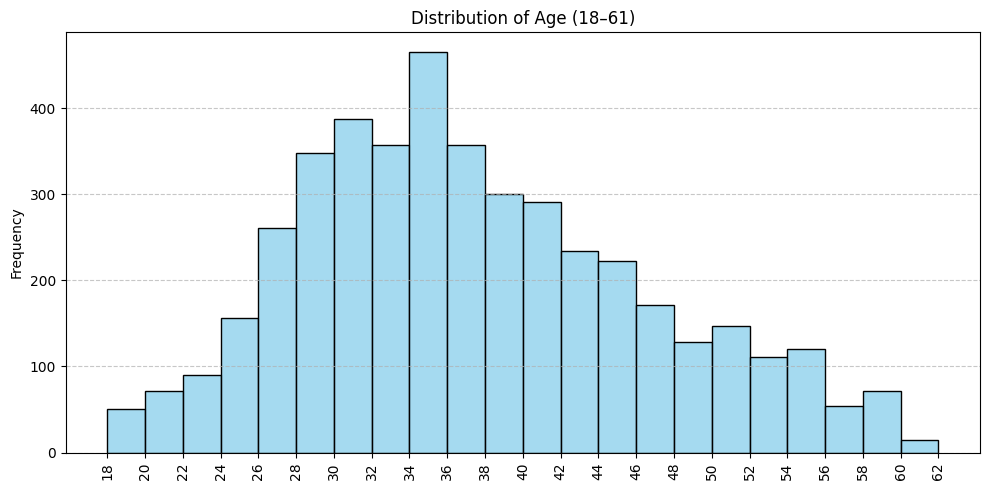

DistanceFromHome


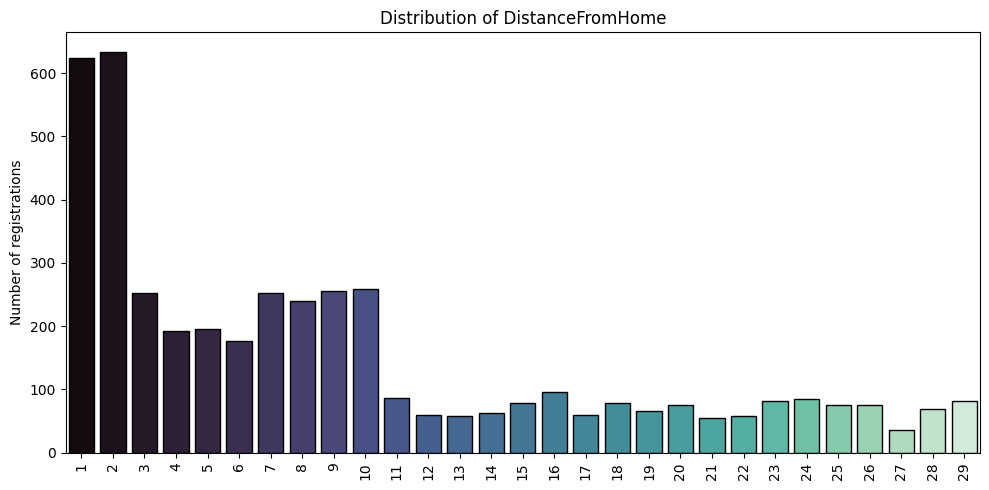

Education


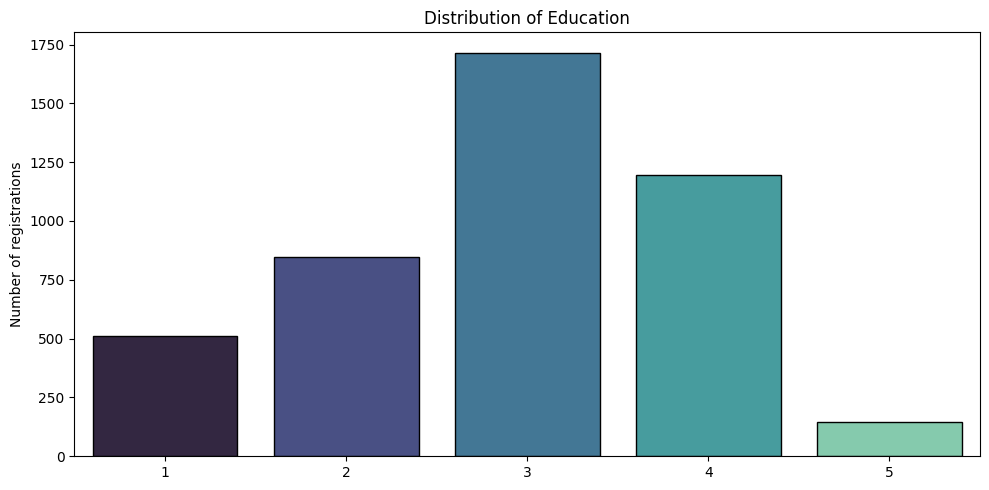

JobLevel


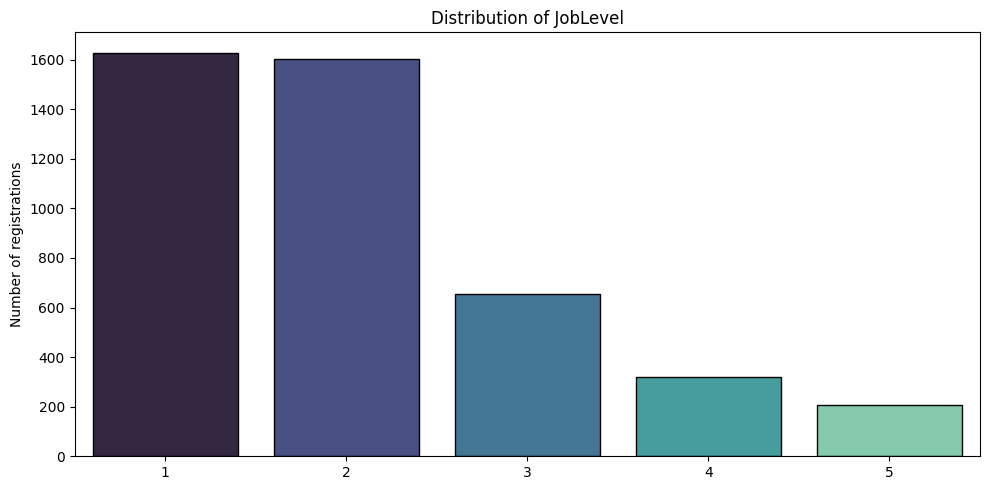

MonthlyIncome


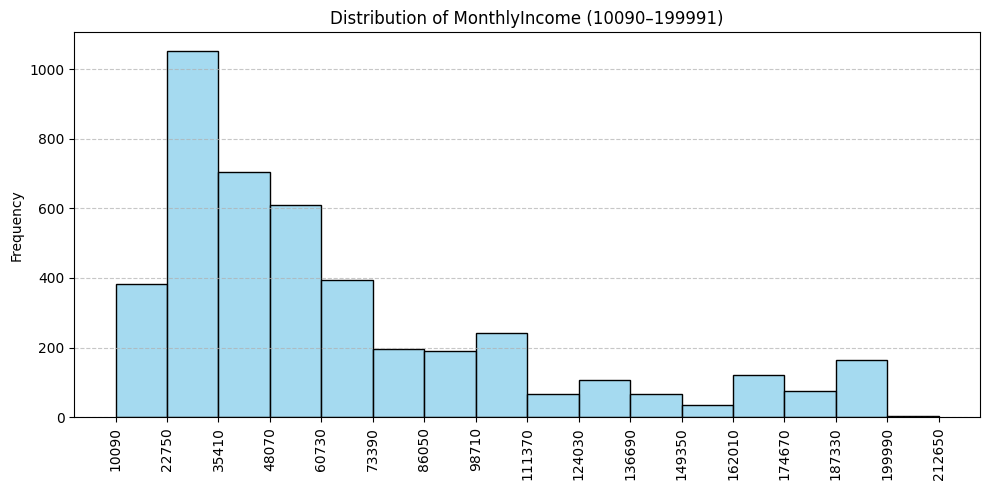

NumCompaniesWorked


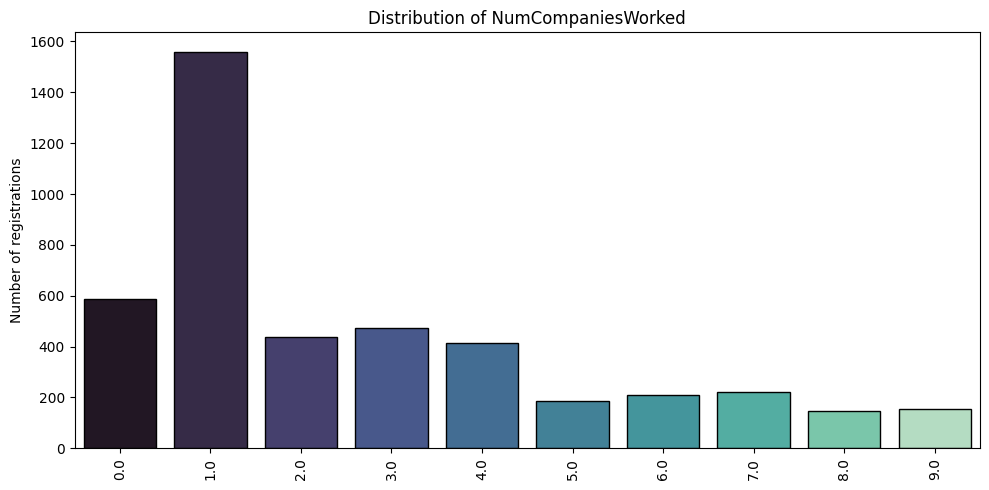

PercentSalaryHike


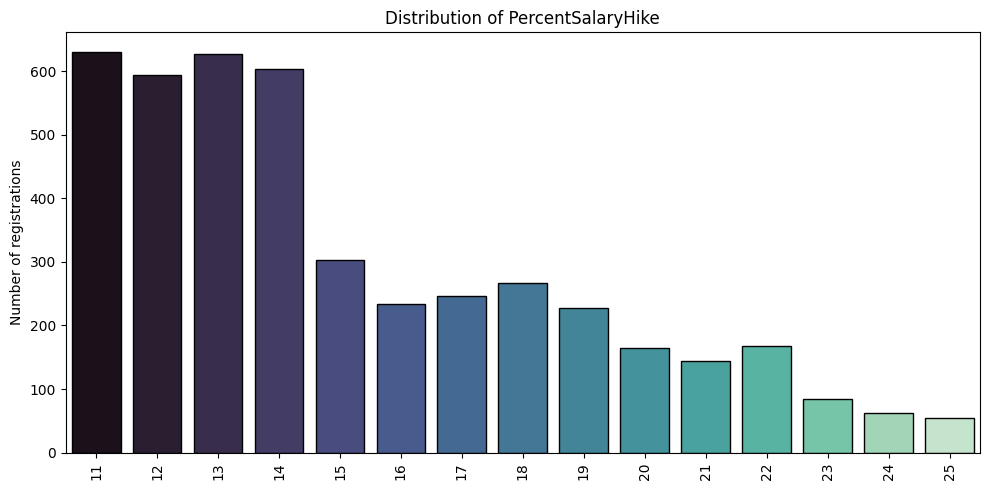

StockOptionLevel


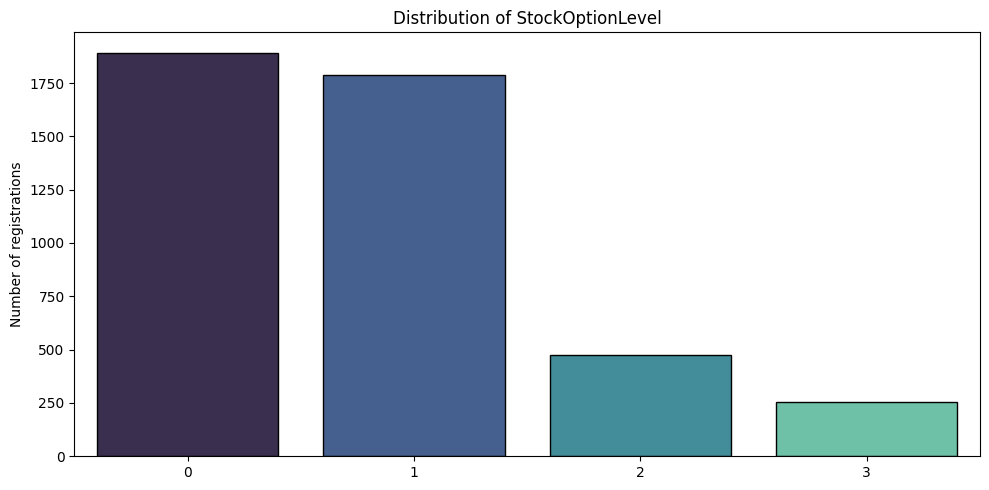

TotalWorkingYears


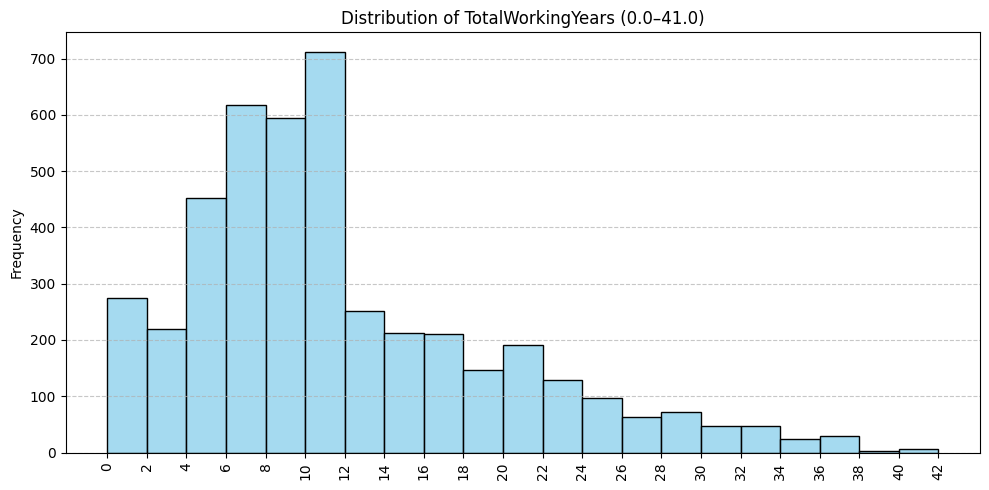

TrainingTimesLastYear


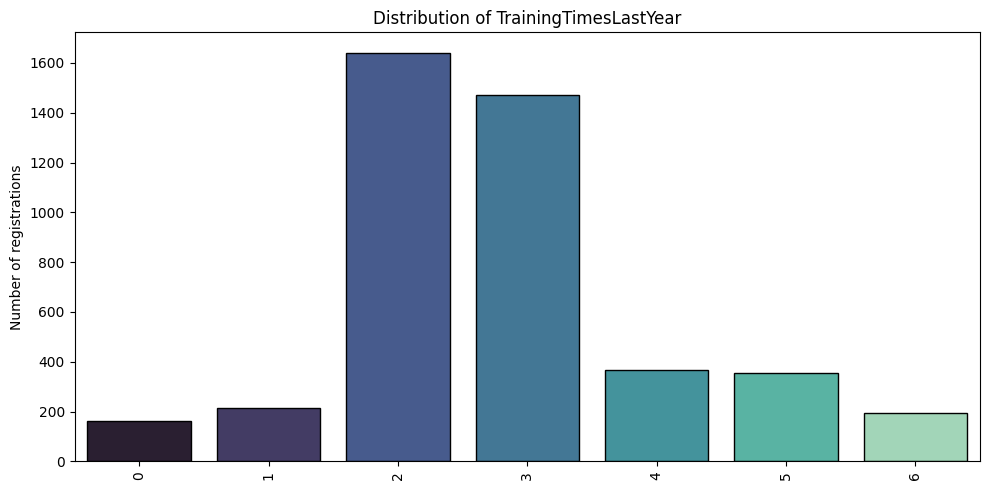

YearsAtCompany


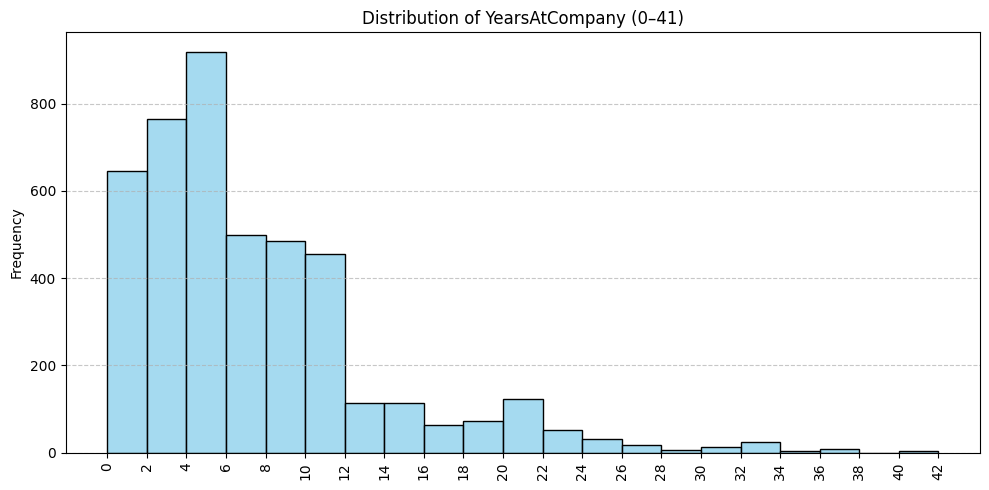

YearsSinceLastPromotion


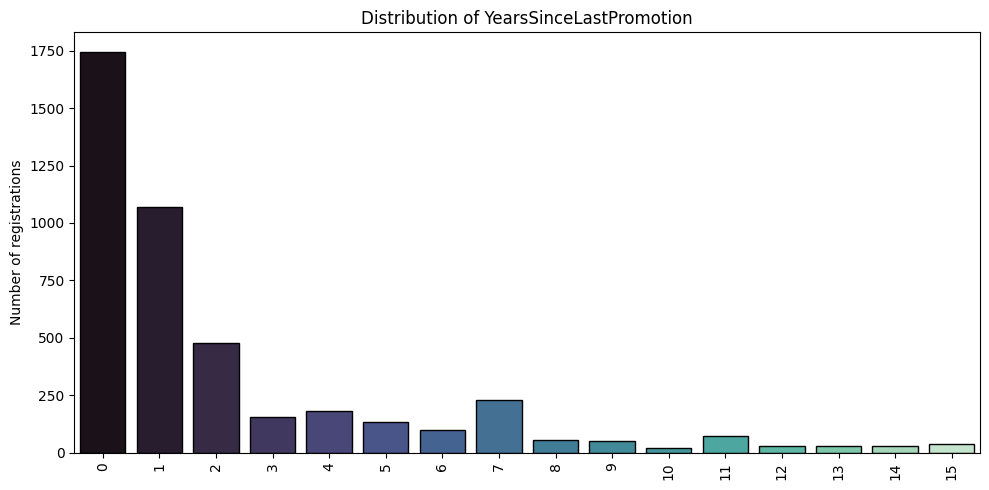

YearsWithCurrManager


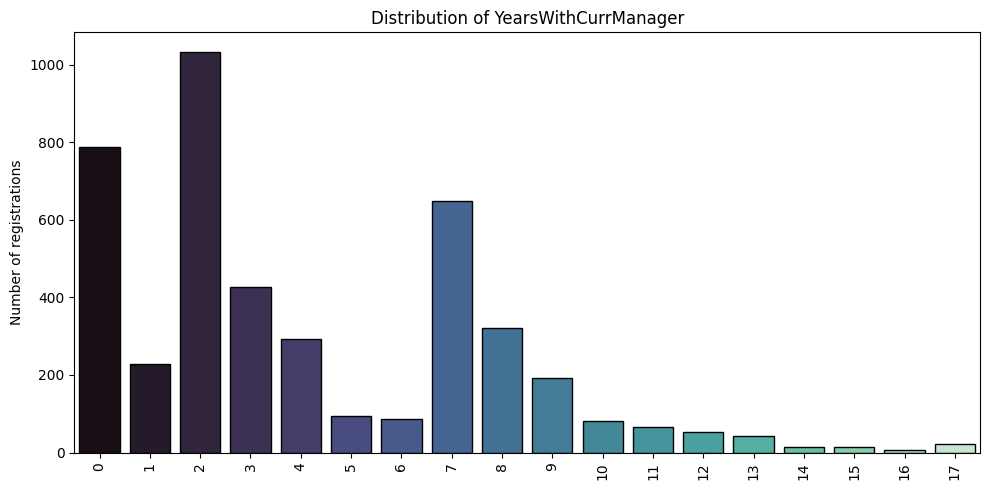

EnvironmentSatisfaction


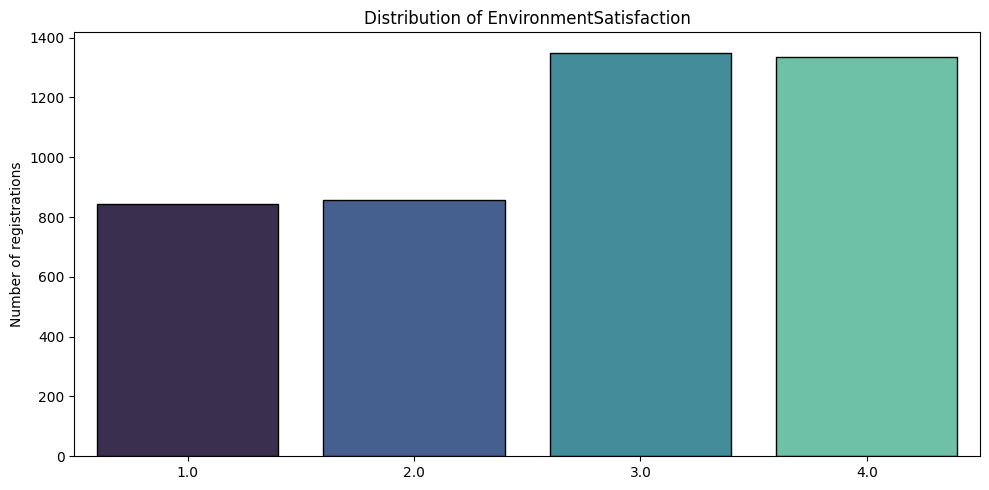

JobSatisfaction


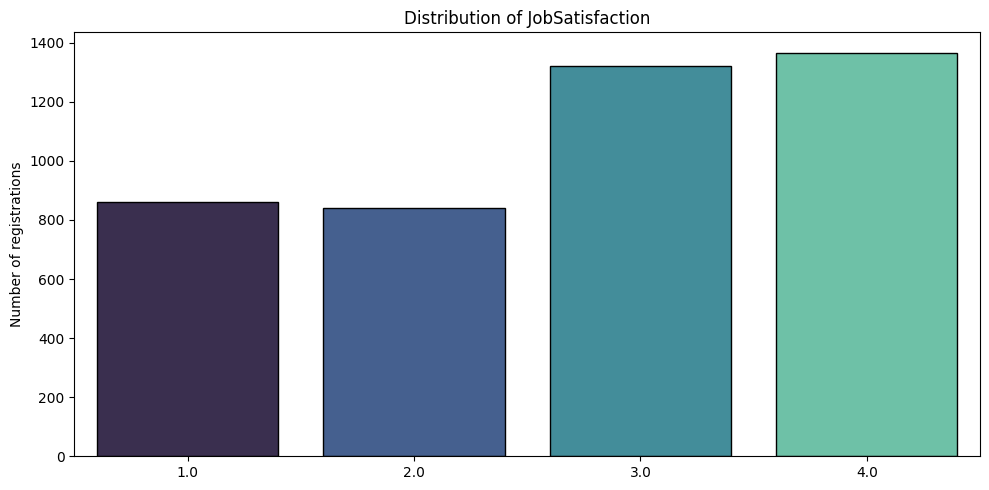

WorkLifeBalance


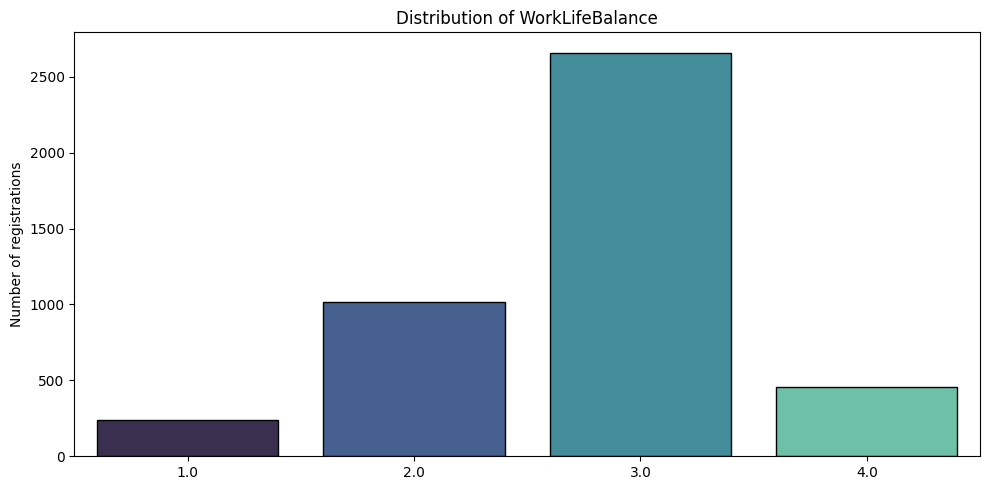

JobInvolvement


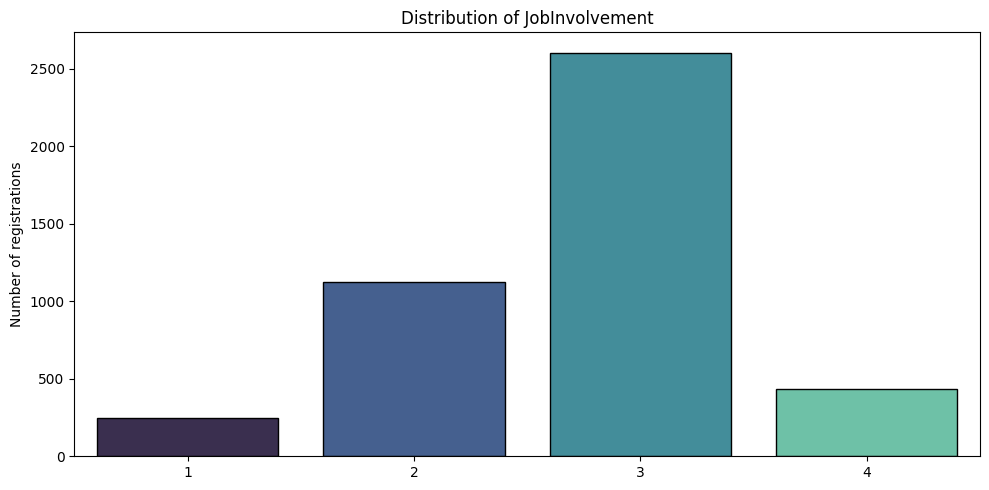

PerformanceRating


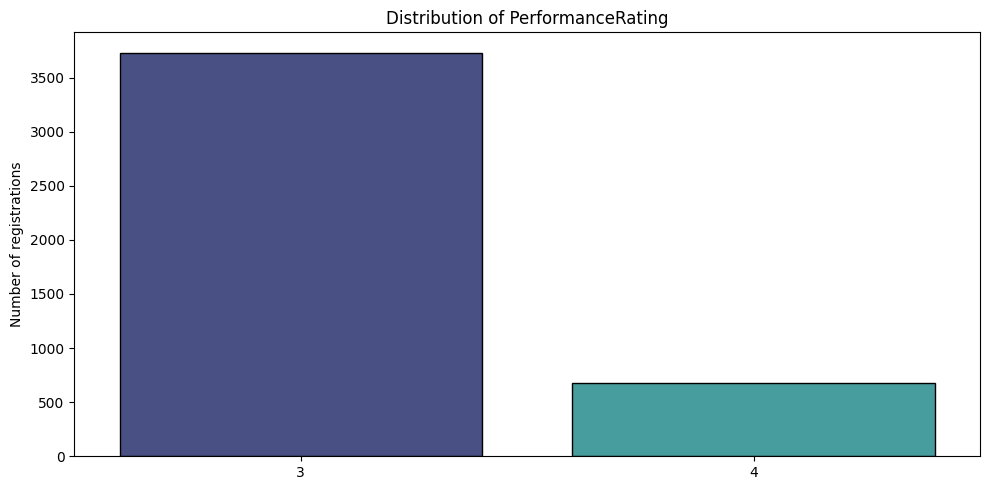

In [83]:
for col in num_cols:
    print(col)
    
    rot = 90 if df[col].nunique() > 5 else 0
    quick_plot_numeric(df, col, 15, rotation=rot)

In [84]:
cat_cols = df.select_dtypes(include=['O', 'category'])

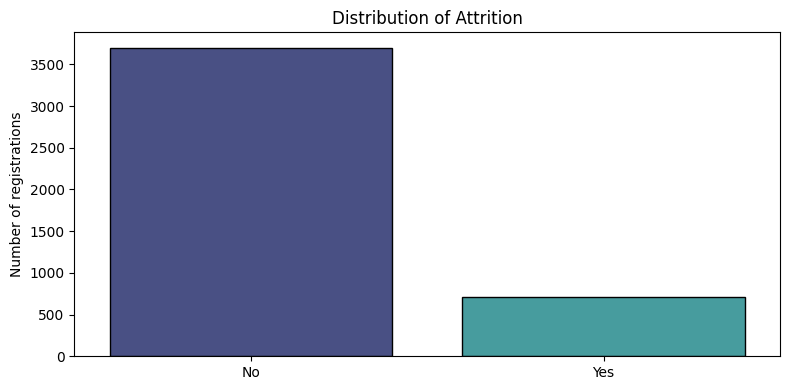

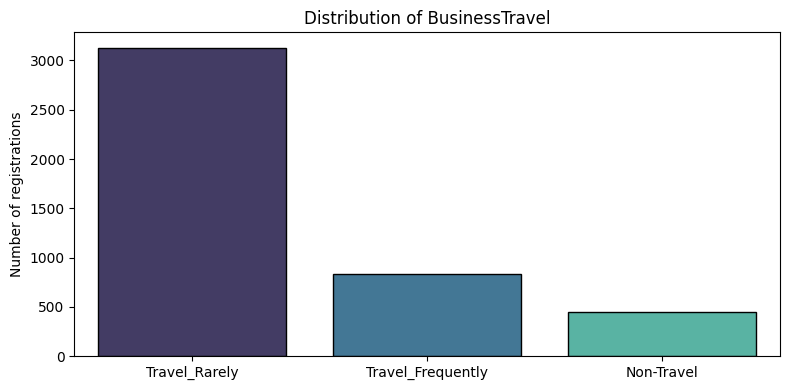

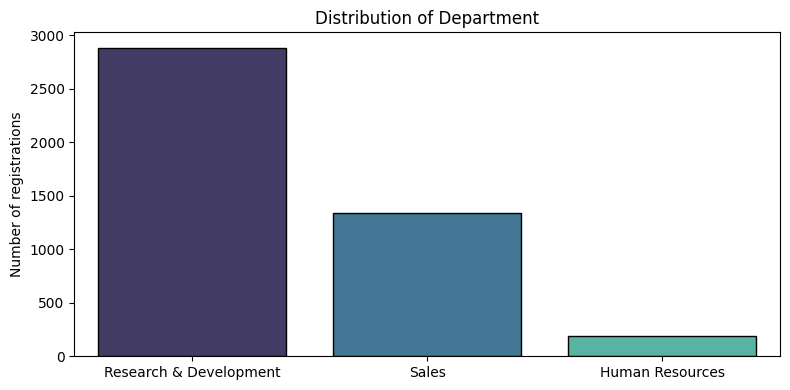

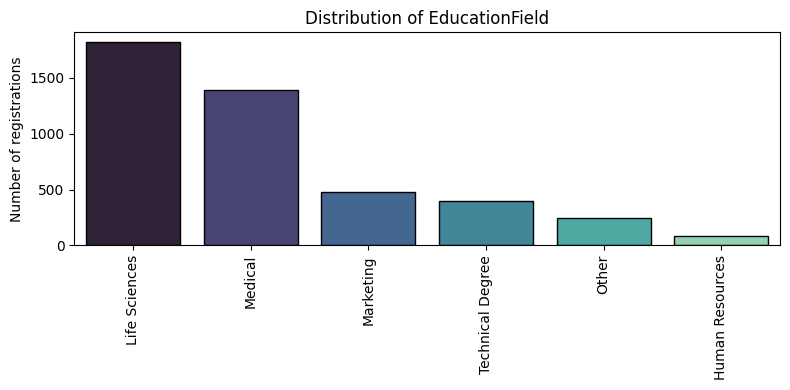

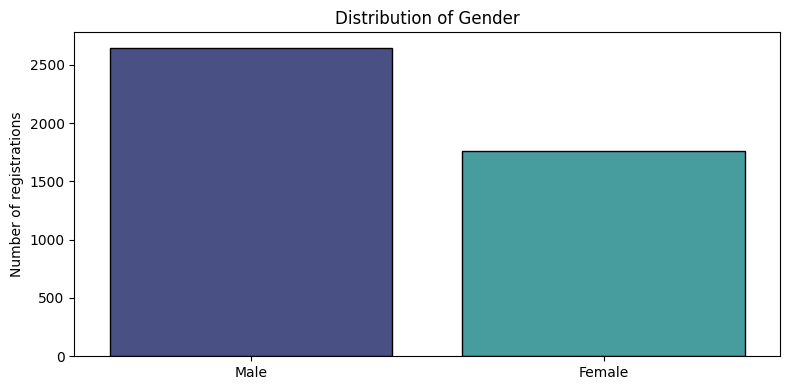

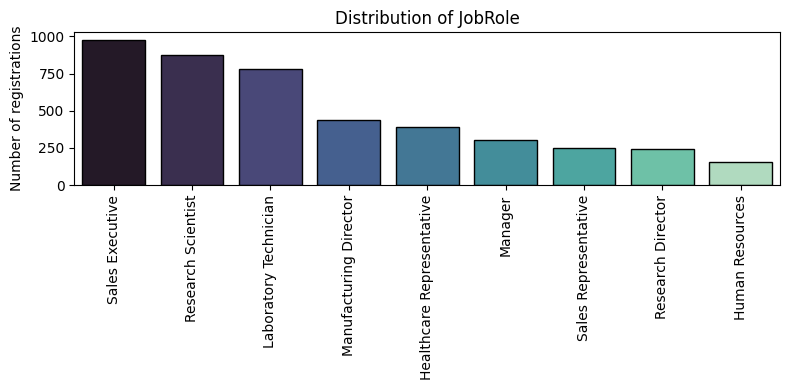

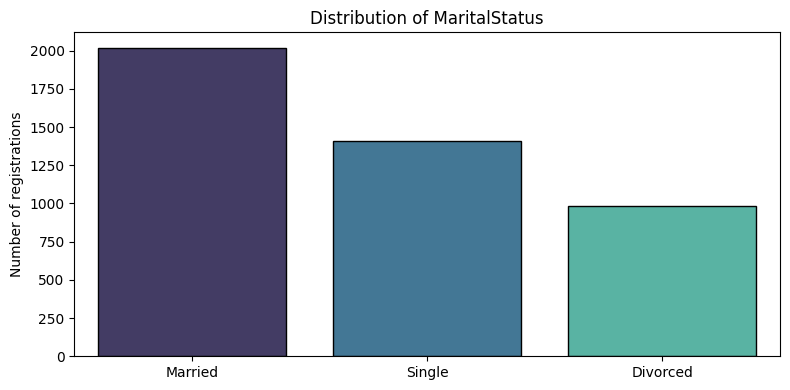

In [85]:
for col in cat_cols:

    rot = 90 if df[col].nunique() > 5 else 0

    plot_categoric_distribution(df, col, rotation=rot)

---

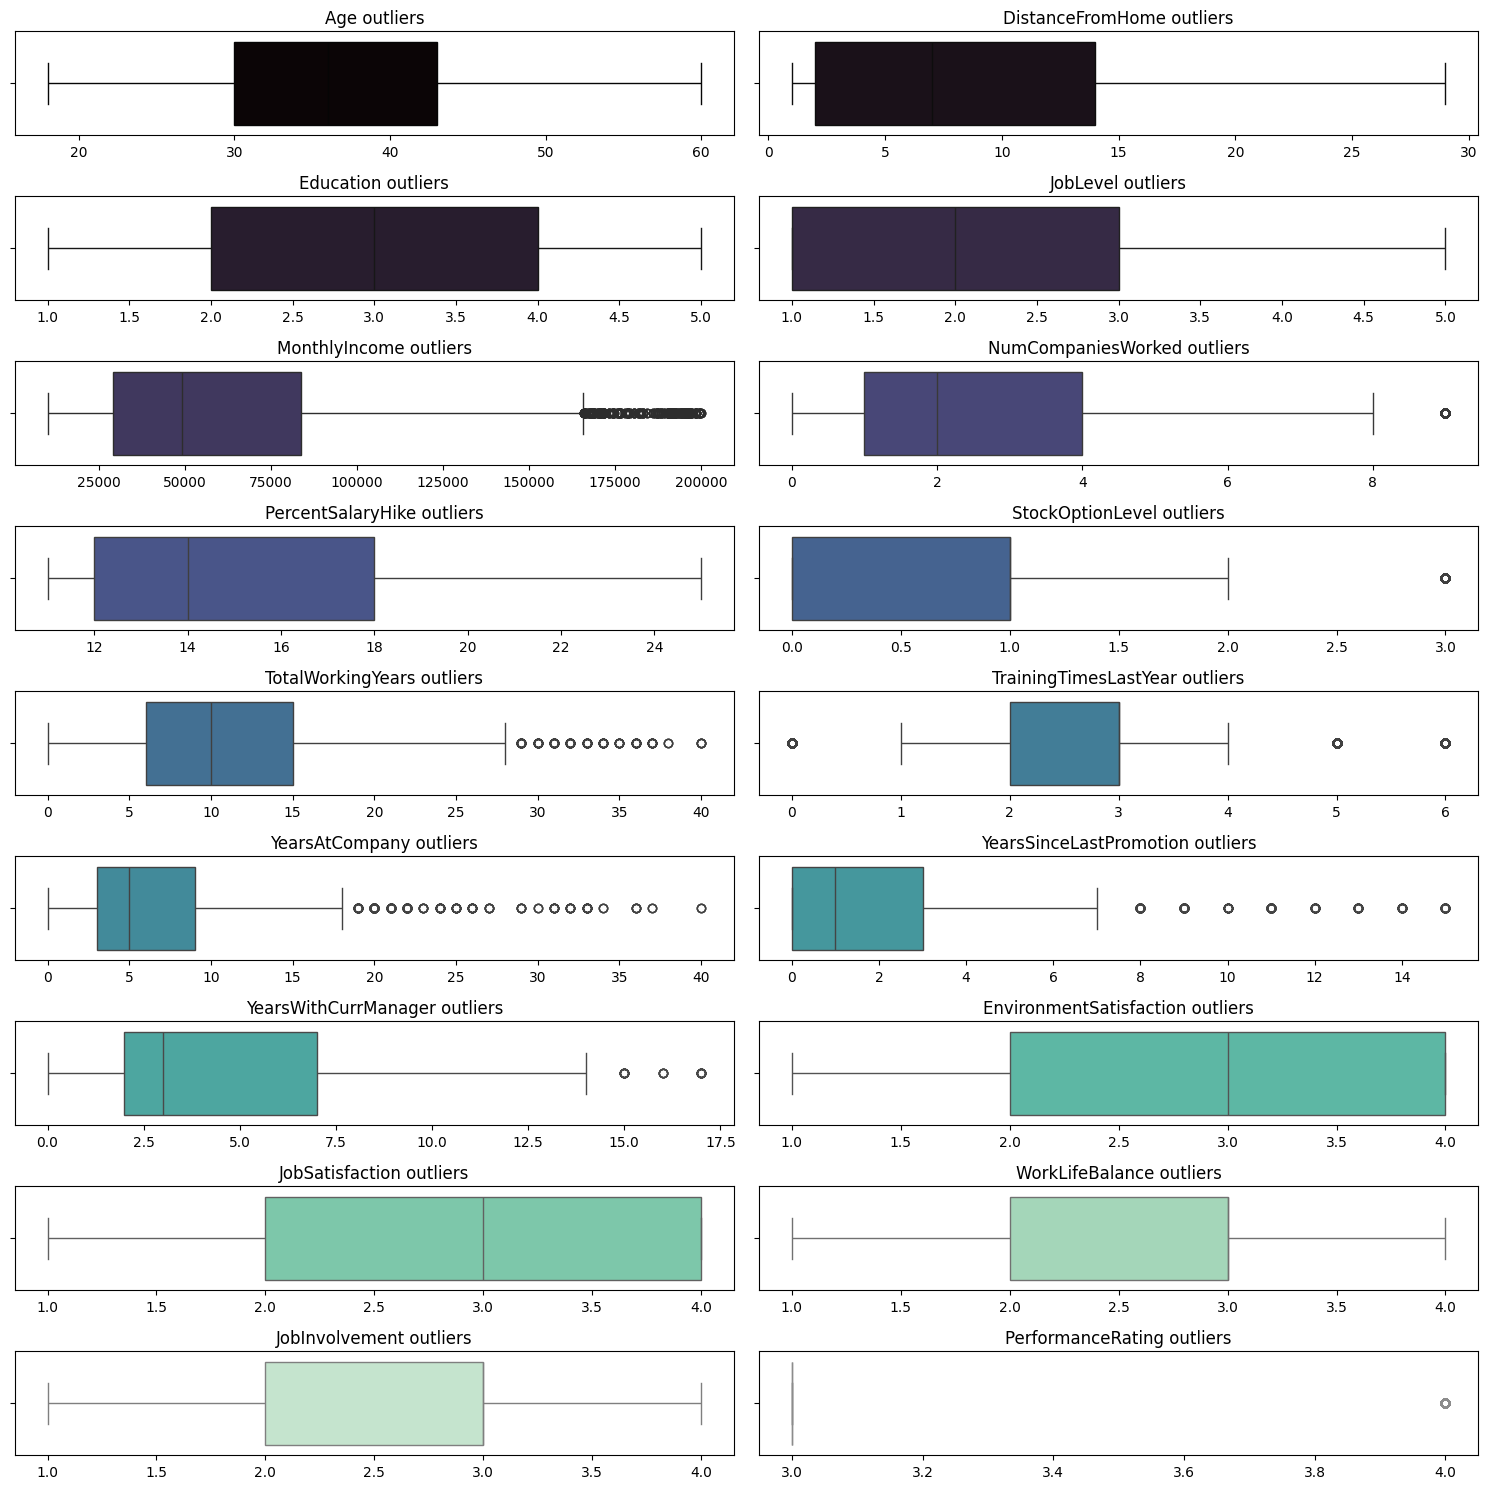

In [86]:
plot_outliers(df, size = (15, 15))

---

## Plot target variable relationships

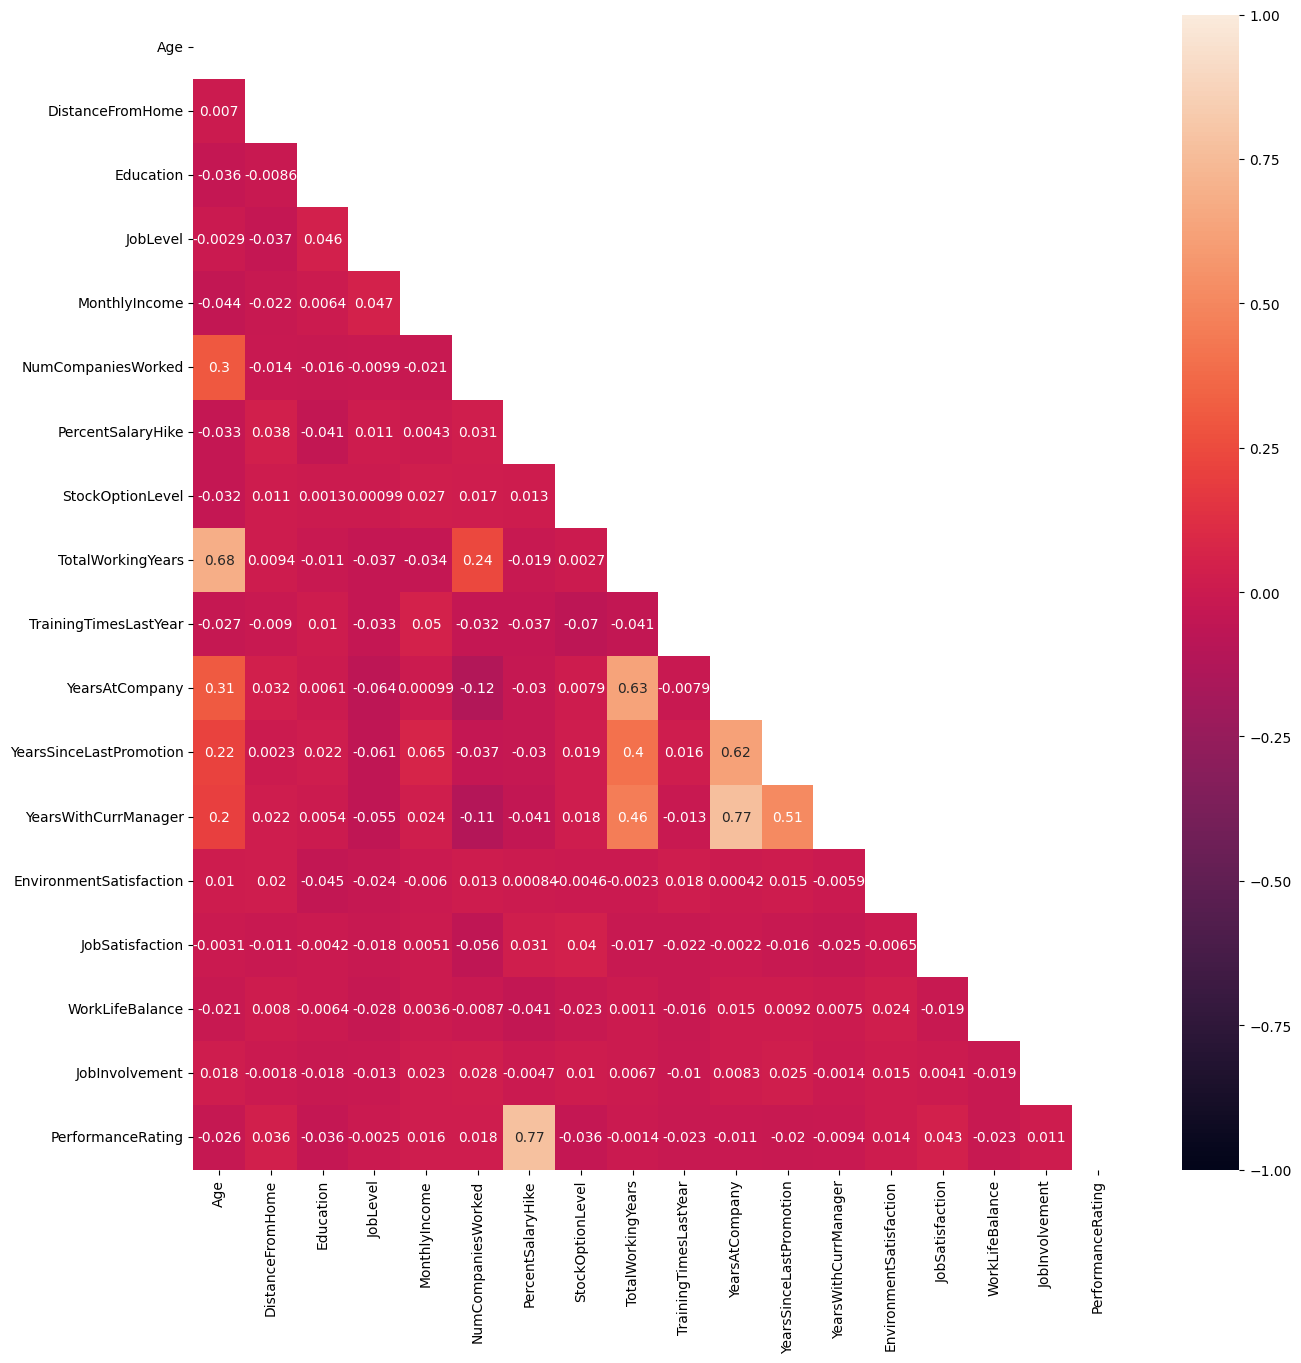

In [87]:
plot_correlation_matrix(df, size = (15, 15))

## Groupby relationships

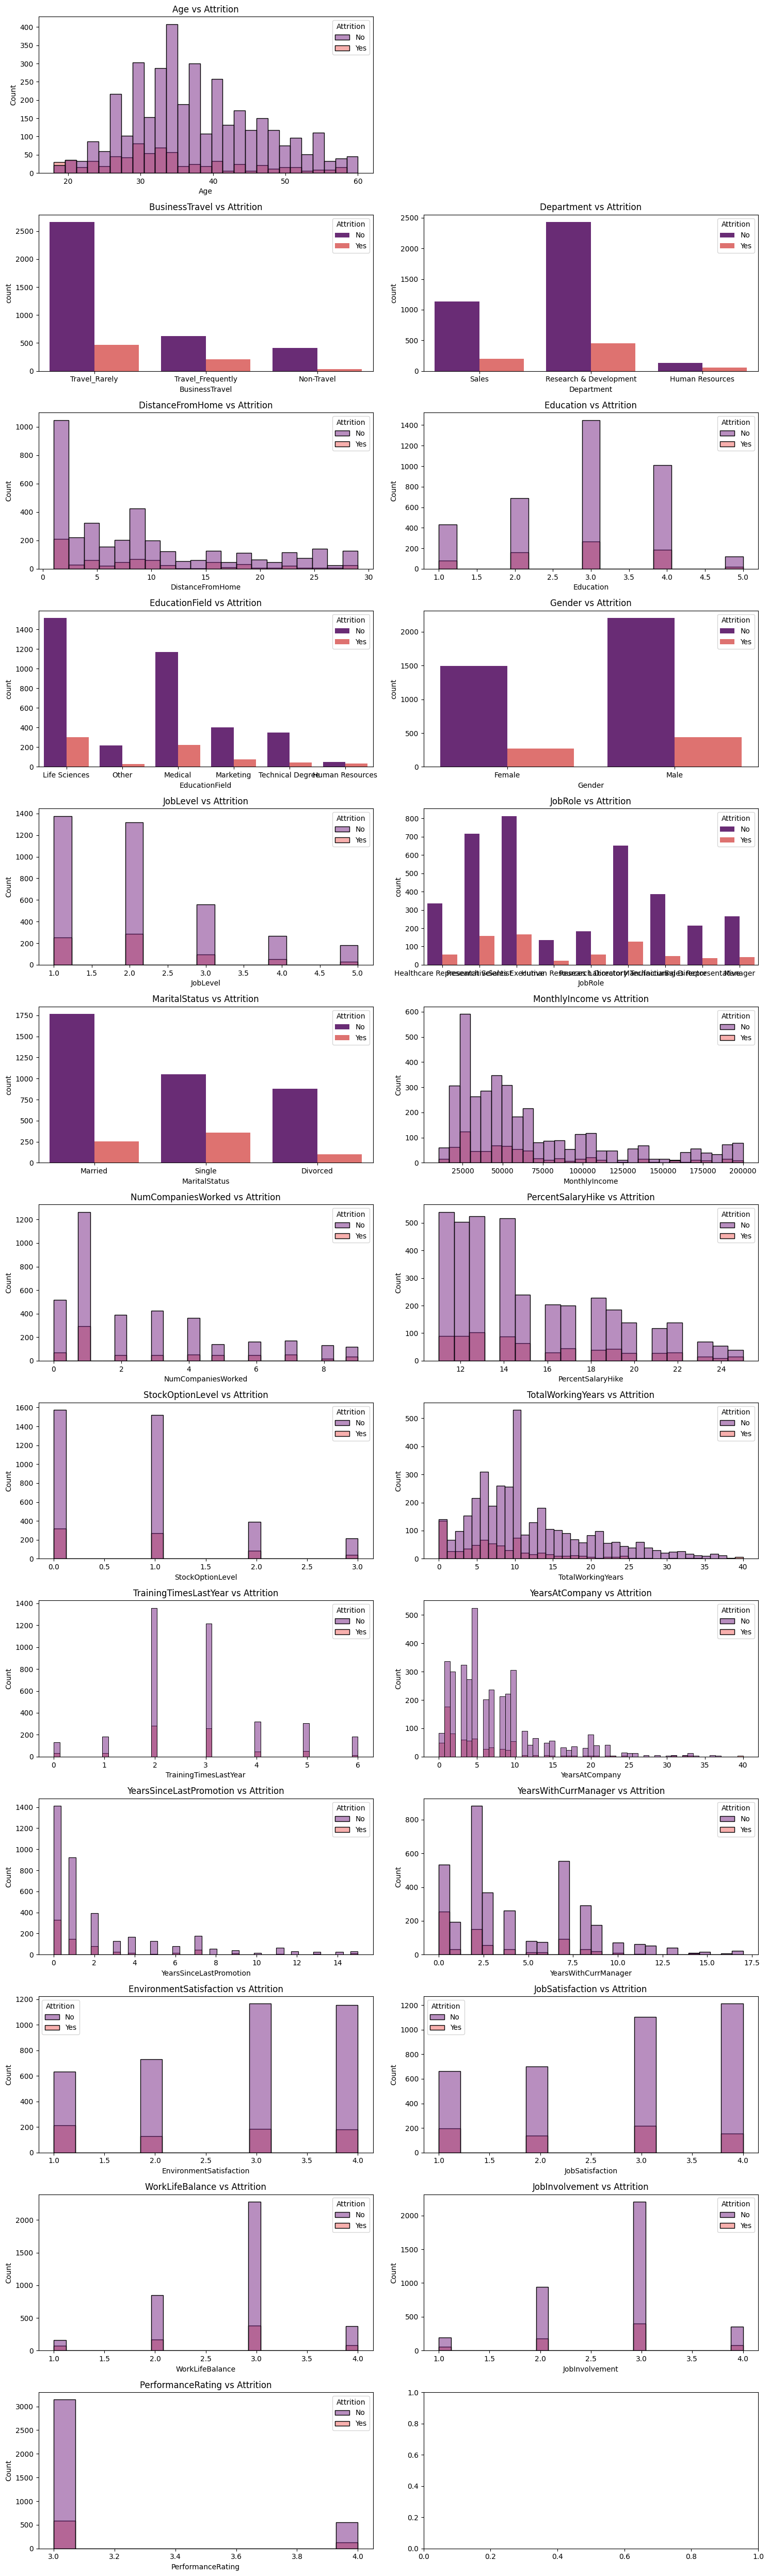

In [88]:
plot_relation_tv(df, 'Attrition', size=(15, 2 * len(df.columns)), n_cols=2)

In [89]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating'],
      dtype='object')

Vamos a eliminar las columnas:

`YearsWithCurrManager`: tiene una correlación muy alta con `YearsAtCompany`

`PerformanceRating`: tiene una correlación muy alta con `PercentSalaryHike`

In [90]:
df.drop(columns=['YearsWithCurrManager', 'PerformanceRating'], inplace=True)

## Data save

In [91]:
df.to_csv('../data/output/complete_data.csv') 